In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
new_age_var = np.where(titanic_train['Age'].isnull, 32,titanic_train['Age'])

In [4]:
titanic_train['Age'] = new_age_var

In [5]:
le = preprocessing.LabelEncoder()

In [6]:
encoded_sex = le.fit_transform(titanic_train['Sex'])

In [7]:
tree_model = tree.DecisionTreeClassifier()

In [8]:
tree_model.fit(X =pd.DataFrame(encoded_sex), y=titanic_train['Survived'])

DecisionTreeClassifier()

In [9]:
with open('Dtree.dot','w') as f:
    f = tree.export_graphviz(tree_model, feature_names = ['Sex'], out_file=f)

**As demonstrated in the class we will make Decision Tree with 'Sex','Age','Fare'**

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
titanic_train['Sex'] = le.fit_transform(titanic_train['Sex'])

In [13]:
titanic_train['Embarked'] = le.fit_transform(titanic_train['Embarked'])

In [14]:
rf_model = RandomForestClassifier(n_estimators =1000,max_features = 2, oob_score=True)

In [15]:
features = ['Sex','Pclass','SibSp','Embarked','Age','Fare']

In [16]:
rf_model.fit(X=titanic_train[features], y=titanic_train['Survived'])

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [17]:
print('The accuracy OOB Score is: ', rf_model.oob_score_)

The accuracy OOB Score is:  0.81214848143982


In [18]:
for feature, imp in zip(features, rf_model.feature_importances_):
    print(feature,imp)

Sex 0.32923314242159357
Pclass 0.10477728938954024
SibSp 0.062225807971375315
Embarked 0.040246296209202045
Age 0.0
Fare 0.46351746400828897


**from the above observation we can see the high value elements are: Sex,Fare**

*Making Decision Tree with the same*

In [19]:
predictors = pd.DataFrame([encoded_sex,titanic_train['Fare']]).T

In [20]:
tree_model = tree.DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

In [21]:
tree_model.fit(X=predictors, y=titanic_train['Survived'])

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

In [22]:
with open('Dtree2.dot','w') as f:
    f = tree.export_graphviz(tree_model, feature_names = ['Sex','Fare'], out_file =f)

**Checking Accuracy**

In [23]:
tree_model.score(X=predictors, y= titanic_train['Survived'])

0.7997750281214848

**Grpahviz Illustration displaying the Rules**

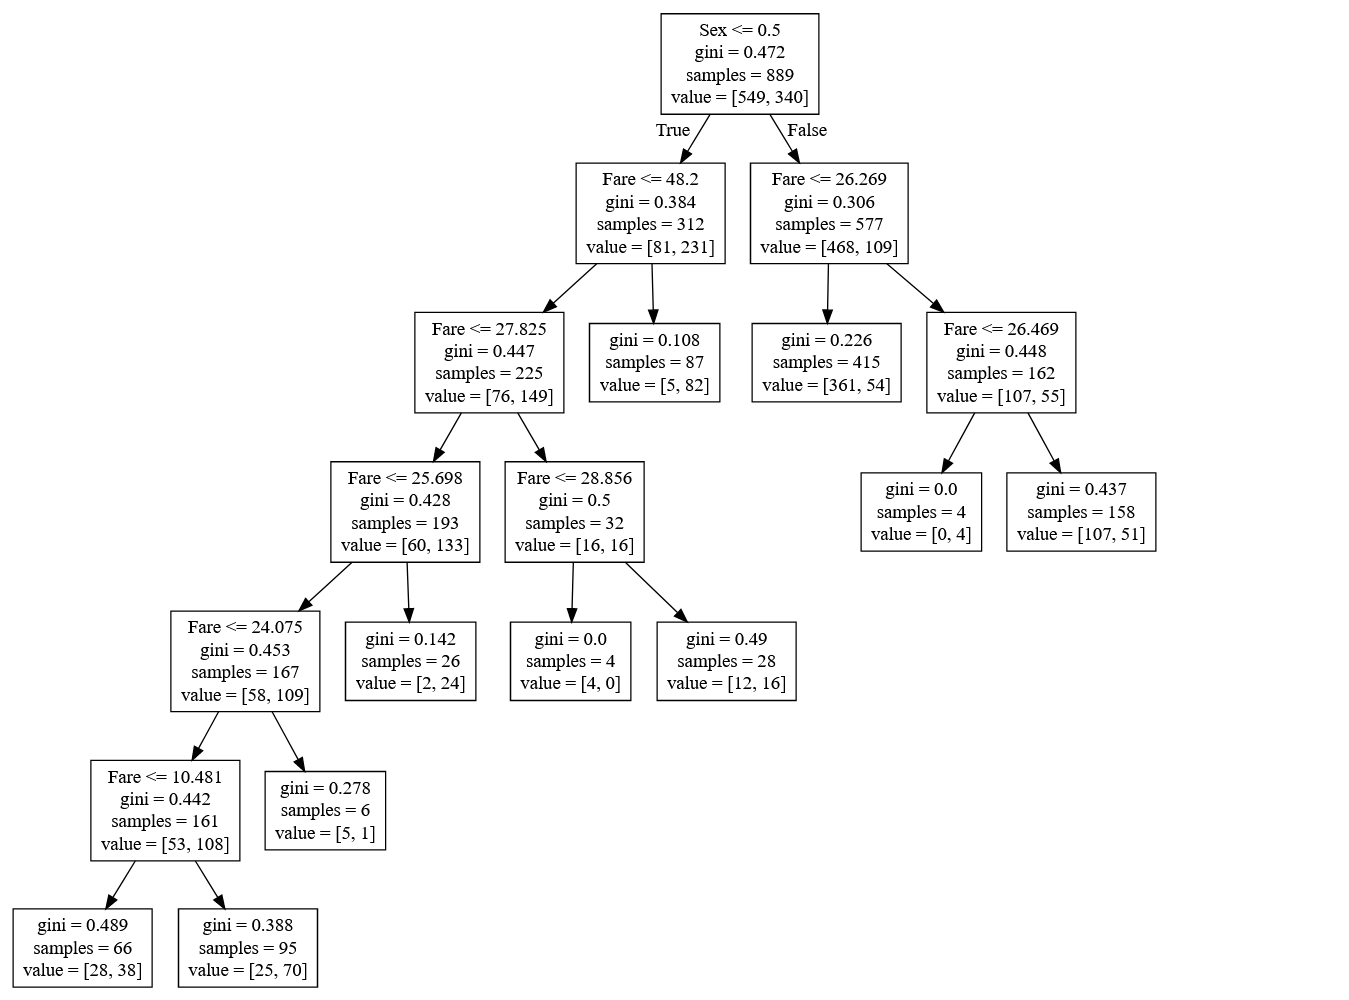